In [1]:
from itertools import combinations
import networkx as nx
import numpy as np
import osmnx as ox
import random
import scipy as sp


In [11]:
def generate_montreal_graph():
    MDG = ox.graph_from_place("Montréal, QC, Canada", network_type="drive")
    MDG = nx.convert_node_labels_to_integers(MDG) # Use label to deal with node id
    MG = ox.utils_graph.get_undirected(MDG) # MultiDiGraph -> MultiGraph
    ox.io.save_graphml(MG, 'montreal-graph.graphml')
    fig, ax = ox.plot_graph(MG, node_color="white", node_size=100)
    return MG

In [12]:
def generate_downtown_montreal_graph():
    # define a bounding box Centre-ville, Montréal, QC, Canada
    north, east = 45.512984, -73.553328
    south, west = 45.496527, -73.581779

    # create network from that bounding box
    MDG = ox.graph_from_bbox(north, south, east, west, network_type="drive")
    MDG = nx.convert_node_labels_to_integers(MDG) # Use label to deal with node id
    MG = ox.utils_graph.get_undirected(MDG) # MultiDiGraph -> MultiGraph
    ox.io.save_graphml(MG, 'montreal-downtown-graph.graphml')
    fig, ax = ox.plot_graph(MG, node_color="white", node_size=100)
    return MG

In [13]:
def generate_district_graph():
    # define a point at the corner of California St and Mason St in SF
    location_point = (37.791427, -122.410018)

    # create network from point, inside bounding box of N, S, E, W each 100m from point
    MDG = ox.graph_from_point(location_point, dist=200, dist_type="bbox", network_type="drive")
    MDG = nx.convert_node_labels_to_integers(MDG) # Use label to deal with node id
    MG = ox.utils_graph.get_undirected(MDG) # MultiDiGraph -> MultiGraph
    ox.io.save_graphml(MG, 'district-graph.graphml')
    fig, ax = ox.plot_graph(MG, node_color="white", node_size=100)
    return MG

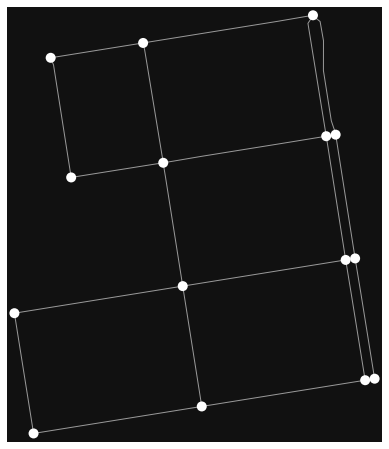

In [15]:
G1 = generate_district_graph()

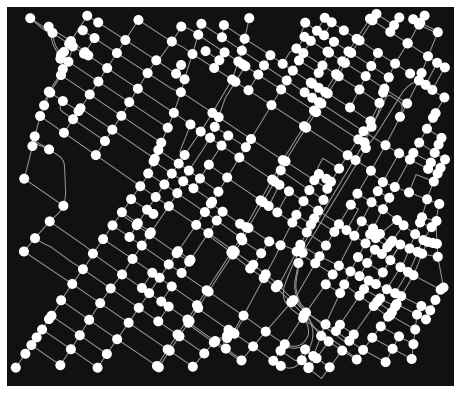

In [14]:
G2 = generate_downtown_montreal_graph()

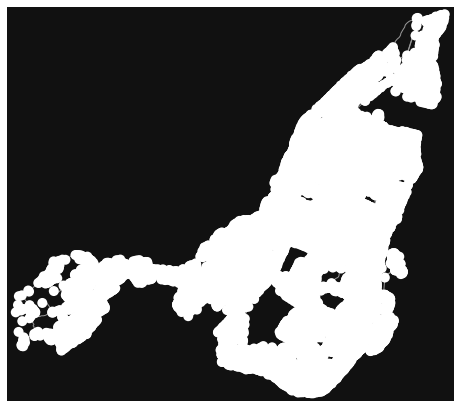

In [18]:
G3 = ox.io.load_graphml('montreal-graph.graphml')
fig, ax = ox.plot_graph(G3, node_color="white", node_size=100)

In [31]:
import pandas as pd
import solver

In [32]:
def find_circuit(MG):
      # Graph eulerization
    G_aug = solver.eulerize_graph(MG)

    # Find shortest circuit

    print(nx.is_eulerian(G_aug))

    print("find_shortest_circuit")
    euler_circuit = solver.find_shortest_circuit(G_aug, MG, start_node=0)

   # Print Circuit
    for i, edge in enumerate(euler_circuit):
        if i == 0:
            print(edge[0], end=" => ")
            print(edge[1], end="")
        else:
            print(end=" => ")
            print(edge[1], end="")

    print('\n')


    # Compute statistics
    total_mileage_of_circuit = sum([edge[2][0]['length'] for edge in euler_circuit])
    total_mileage_on_orig_trail_map = sum(nx.get_edge_attributes(MG, 'length').values())
    _vcn = pd.value_counts(pd.value_counts([(e[0]) for e in euler_circuit]), sort=False)
    node_visits = pd.DataFrame({'n_visits': _vcn.index, 'n_nodes': _vcn.values})
    _vce = pd.value_counts(pd.value_counts([sorted(e)[0] + sorted(e)[1] for e in nx.MultiDiGraph(euler_circuit).edges()]))
    edge_visits = pd.DataFrame({'n_visits': _vce.index, 'n_edges': _vce.values})

    # Printing stats
    print('Mileage of circuit: {0:.2f}'.format(total_mileage_of_circuit))
    print('Mileage on original trail map: {0:.2f}'.format(total_mileage_on_orig_trail_map))
    print('Mileage retracing edges: {0:.2f}'.format(total_mileage_of_circuit-total_mileage_on_orig_trail_map))
    print('Percent of mileage retraced: {0:.2f}%\n'.format((1-total_mileage_of_circuit/total_mileage_on_orig_trail_map)*-100))

    print('Number of edges in circuit: {}'.format(len(euler_circuit)))
    print('Number of edges in original graph: {}'.format(len(MG.edges())))
    print('Number of nodes in original graph: {}\n'.format(len(MG.nodes())))

    print('Number of edges traversed more than once: {}\n'.format(len(euler_circuit)-len(MG.edges())))

    print('Number of times visiting each node:')
    print(node_visits.to_string(index=False))

    print('\nNumber of times visiting each edge:')
    print(edge_visits.to_string(index=False))

In [34]:
find_circuit(G1)

nodes_odd_degree
6
max_weight_matching
add_augmenting_path_to_graph
True
find_shortest_circuit


NetworkXError: nbunch is not a node or a sequence of nodes.

In [29]:
G1